In [186]:
import numpy as np
import matplotlib.pyplot as plt

$\text{More about } a_{i}, b_{i}, c_{i} \text{ and }\xi^{n}_{j}\text{ : https://studme.org/231876/matematika_himiya_fizik/raznostnaya_shema_krankanikolsona} $

In [187]:
def solveCrankNicolson(t, x, q0, qL, T0,):
	dx = x[1] - x[0]
	dt = t[1] - t[0]
	U = np.zeros((t.size, x.size))
	U[0, :] = T0(x)
	Ai = - dt / (2 * dx ** 2)
	Bi = 1 + dt / dx ** 2
	Ci = Ai
	alpha = np.zeros(x.size - 1)
	beta = np.zeros_like(alpha)
	for time_step in range(t.size - 1):
		alpha[0] = 0
		beta[0] = q0(t[time_step + 1])
		for space_step in range(1, x.size - 1):
			S = U[time_step, space_step] + (dt / (2 * dx ** 2)) * (U[time_step, space_step + 1] - 2 * U[time_step, space_step] + U[time_step, space_step - 1])
			# right part of equation, S is ksi nj
			alpha[space_step] = -Ci / (Bi + Ai * alpha[space_step - 1])
			beta[space_step] = (S - Ai * beta[space_step - 1]) / (Bi + Ai * alpha[space_step - 1])
			# https://ru.wikipedia.org/wiki/Метод_прогонки
		U[time_step + 1, x.size - 1] = qL(t[time_step + 1])
		for space_step in range(x.size - 2, -1, -1):
			U[time_step + 1, space_step] = alpha[space_step] * U[time_step + 1, space_step + 1] + beta[space_step]
	return U

In [188]:
Nx = 100
Nt = 100
T = 1
L = 1
t = np.linspace(0, T, Nt)
x = np.linspace(0, L, Nx)
q0 = lambda t: 0
qL = lambda t: 0
T0 = lambda x: x * ((1 - x / L) ** 2)

In [189]:
solution = solveCrankNicolson(t, x, q0, qL, T0)

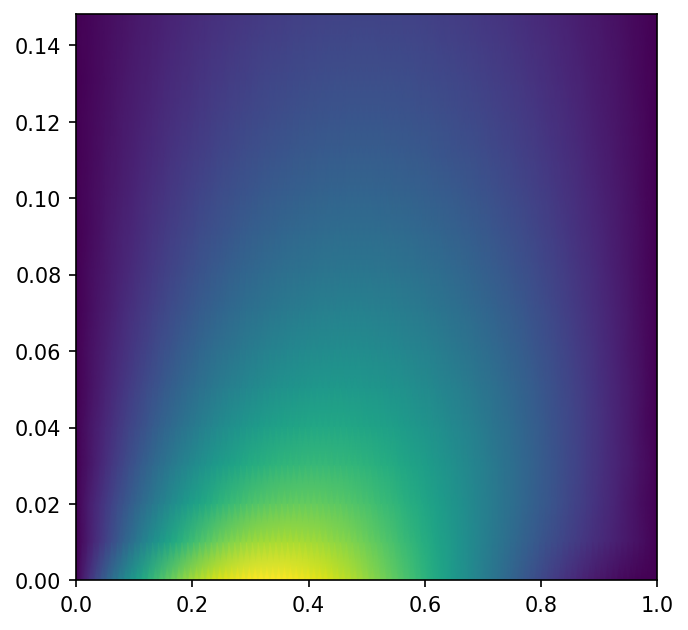

Text(0, 0.5, 'Temperature')

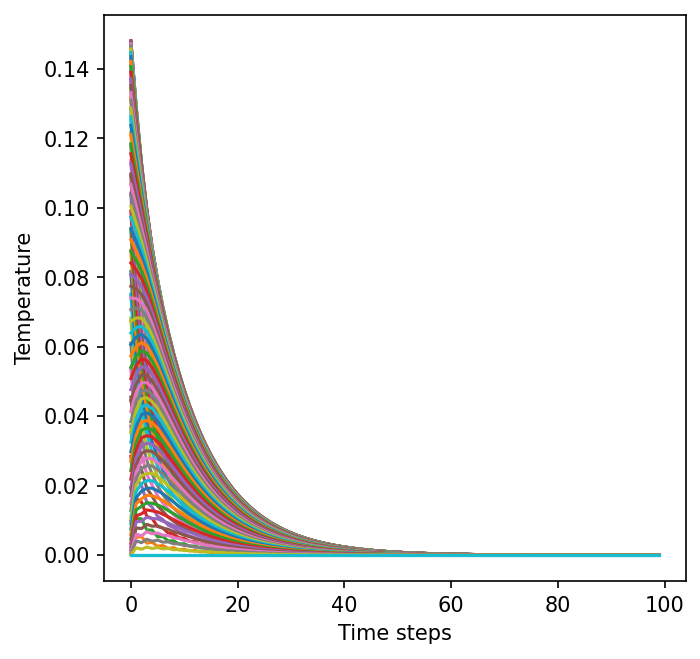

In [194]:
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['figure.dpi'] = 150
plt.pcolormesh(x, t, solution, shading='gouraud')
plt.xlim(0, L)
plt.ylim(0, np.max(solution))
plt.show()

fig, ax = plt.subplots()
ax.plot(solution)
plt.xlabel('Time steps')
plt.ylabel('Temperature')